## Observations and Insights 

In [1]:
# Dependencies and Setup
## import numpy as np ... we learned in class that it is good practice
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
## I typically open the csv files to analyze the header data
combinedf = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")
combinedf
# Display the data table for preview
## .head() give us a 5 row overview of our data plus the headers
combinedf.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
## Using the Mosue ID column to count the number of mice
## .nunique() method returns the number of unique values for each column
micecount = combinedf["Mouse ID"].count()
micecount

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicatemice = combinedf.loc[combinedf.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicatemice


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicatemiceid = combinedf.loc[combinedf["Mouse ID"] == "g989"]
duplicatemiceid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
finalmicecount = combinedf[combinedf['Mouse ID'].isin(duplicatemiceid)==False]
finalmicecount

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
micedf = finalmicecount['Mouse ID'].count()
micedf

1893

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

finalmicecount['Tumor Volume (mm3)'].describe()



count    1893.000000
mean       50.448381
std         8.894722
min        22.050126
25%        45.000000
50%        48.951474
75%        56.292200
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_regimen_group = finalmicecount.groupby("Drug Regimen")
mean = drug_regimen_group['Tumor Volume (mm3)'].mean()
median = drug_regimen_group['Tumor Volume (mm3)'].median()
variance = drug_regimen_group['Tumor Volume (mm3)'].var()
standard_dv = drug_regimen_group['Tumor Volume (mm3)'].std()
sem = drug_regimen_group['Tumor Volume (mm3)'].sem()
print(drug_regimen_group["Mouse ID"].count())

# Assemble the resulting series into a single summary dataframe.
singlesummarydf = pd.DataFrame({"Mean": mean,"Median":median,"Variance": variance,"Standard Deviation":standard_dv,"SEM":sem})
singlesummarydf

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

aggregationmethod = finalmicecount.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean','median','var','std','sem'])
aggregationmethod

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

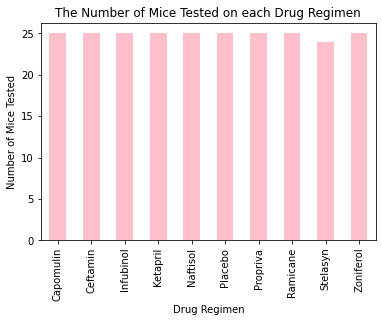

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
## for this line we will hold off on using plt.bar becasue that used pyplot... i prefer to use pyplot becasue it makes the data look cleaner imo

micebar = finalmicecount.groupby(["Drug Regimen"])["Mouse ID"].nunique()
micebarpandas = micebar.plot(kind="bar",title ="The Number of Mice Tested on each Drug Regimen",facecolor="pink")
micebarpandas.set_ylabel("Number of Mice Tested")
#Observations: 1) At least 20 mice were tested for each drug 2) Stelasyn was the tested drugs for mice, 3) based on this data, we can say that each drug can be fairly compared to each other for the impact it had on mice tumors


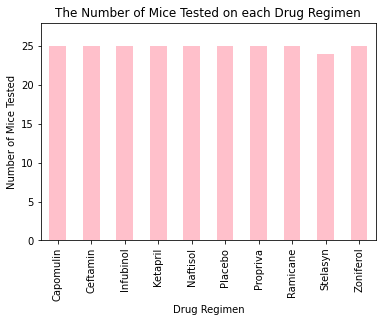

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
##plt.bar("Drug Regimen", "Drug Regimen", color='pink', alpha=0.5, align="center")

bardata = finalmicecount.groupby("Drug Regimen")["Mouse ID"].nunique()

# np.arrange is used for the x axis 
x_axis = np.arange(0,len(bardata))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
plt.title("The Number of Mice Tested on each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# distance from the boarder of the graph on x axis
plt.xlim(-0.5, len(micebar)-0.5)

# distance from the boarder of the graph on the y axis
plt.ylim(0,micebar.max() +3)

plt.bar(bardata.index, bardata, facecolor="pink",align="center",width=0.5)
plt.xticks(tick_locations, bardata.index,rotation="vertical")
# must include plt.show() to display graph
plt.show()

#Observations: 1) At least 20 mice were tested for each drug 2) Stelasyn was the tested drugs for mice, 3) based on this data, we can say that each drug can be fairly compared to each other for the impact it had on mice tumors


Male      125
Female    124
Name: Sex, dtype: int64

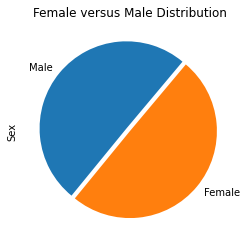

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
micepie = finalmicecount[["Mouse ID", "Sex"]].drop_duplicates()

explode=(0.05,0)
# These colors won't appear in this table but they will appear as stated when you run pyplot
colors = ["lightskyblue","pink"]
micepiepandas = micepie["Sex"].value_counts()
mpp = micepiepandas.plot(kind = "pie", title = "Female versus Male Distribution", startangle = 50, explode = explode)
micepiepandas

##Observations: 1) More male mice were studied compared to female mice, 2) Although the data for female and male is close, it's not exactly 50 /50 so using this data will be making an estimate 3) We don't know why more males were studied compared to female mice



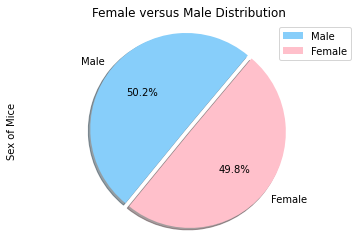

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(micepiepandas, labels = micepiepandas.index,colors=colors,autopct="%1.1f%%", shadow = True, startangle = 50, explode = explode)
plt.axis("equal")
plt.title("Female versus Male Distribution")
# You can customize the title of the y label
plt.ylabel("Sex of Mice")
plt.legend(loc = "upper right")
plt.show()

#Observations: 1) More male mice were studied compared to female mice, 2) Although the data for female and male is close, it's not exactly 50 /50 so using this data will be making an estimate 3) We don't know why more males were studied compared to female mice


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
## grouping by the Mouse ID and searching for the Timepoint to get the max timepoint in the data
maxtimepoint = finalmicecount.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergetimepoint = pd.merge(finalmicecount, maxtimepoint, how = "inner", on = ["Mouse ID", "Timepoint"])



In [14]:
# Put treatments into a list for for loop (and later for plot labels)
druglist = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
## Get ready for a loop because we are setting up an empty list 
tumorvolumedata = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    

    # Determine outliers using upper and lower bounds

#remember that loops for be for x in list soooo set it up to make sense to you   
for finddrug in druglist:
    # we are setting up a new variable to search the mergetimepoint that we set up
    drugvolume = mergetimepoint.loc[mergetimepoint["Drug Regimen"] == finddrug]["Tumor Volume (mm3)"]
    tumorvolumedata.append(drugvolume)
    # normal distribution percentages
    quartiles = drugvolume.quantile([0.25,0.5,0.75])

    iqr = quartiles[0.75] - quartiles[0.25]

    lower_bound = quartiles[0.25] - (1.5*iqr)
    upper_bound = quartiles[0.75] + (1.5*iqr)

    outliers = drugvolume.loc[(drugvolume > upper_bound) | (drugvolume < lower_bound)]     
    
      

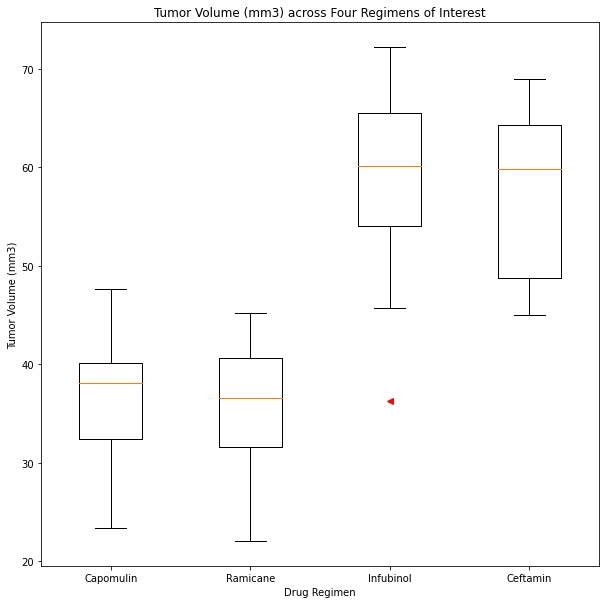

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
## you can change the different markers by researching the dictionary for different markers
redmarker = dict(markerfacecolor="r",marker="<", markeredgecolor="r")
fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.boxplot(tumorvolumedata, flierprops=redmarker)
ax1.set_title("Tumor Volume (mm3) across Four Regimens of Interest")
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.xaxis.set(ticks=range(1,len(druglist) + 1),ticklabels=druglist)

plt.show()

#Observations: 1) Not all drugs were administered at the same volume, 2) The median of each drug is skewed but it appears one drug was more evenly distributed than the other that were displayed, 3)


## Line and Scatter Plots

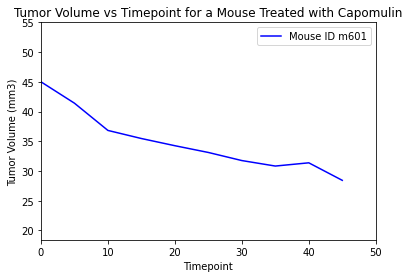

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
miceline = (finalmicecount[finalmicecount["Drug Regimen"] == "Capomulin"]).sample()
randommicedata = pd.merge(finalmicecount, miceline, on = "Mouse ID", how = "inner")
randommiceline = randommicedata.drop([col for col in miceline.columns if '_y' in col], axis=1)

timepointline = randommicedata["Timepoint_x"]
volumeline = randommicedata["Tumor Volume (mm3)_x"]
labelline = randommicedata["Mouse ID"].unique()

lineline, = plt.plot(timepointline, volumeline, 'b-')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoint for a Mouse Treated with Capomulin")
plt.xlim(0, timepointline.max() + 5)
plt.ylim(volumeline.min() - 10, volumeline.max() + 10)
plt.legend("Mouse ID " + labelline)
plt.show()

#Obersevation: 1) The longer the mouse was treated with medicine the smaller the tumor got, 2) The line is negatively skewed, 3) There are some areas where the graph has spikes or periods that fall out of the line of best fit


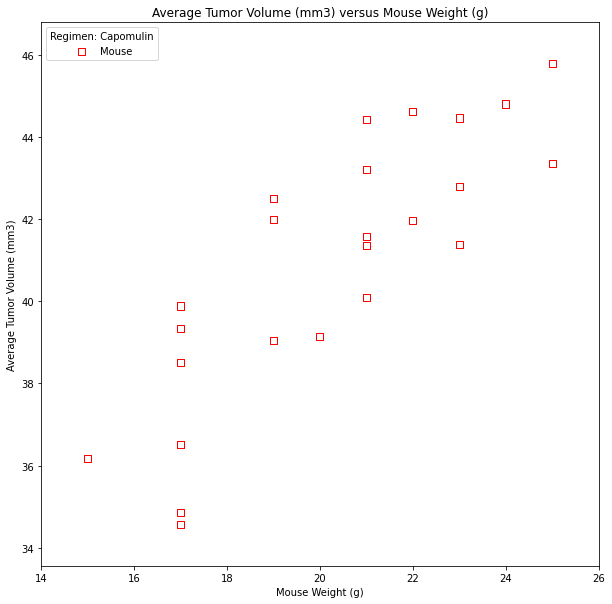

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
micescatter = finalmicecount.loc[finalmicecount["Drug Regimen"] == "Capomulin"]
averagetumorvolume = micescatter.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
averagemiceweight = micescatter.groupby(["Mouse ID"])["Weight (g)"].mean()

mergescatter = pd.merge(averagetumorvolume,averagemiceweight, on="Mouse ID", how="inner")
mergescatterfinal = mergescatter.rename(columns={"Tumor Volume (mm3)": "Avg Tumor Volume (mm3)"})
scattertumorvolume = mergescatterfinal.iloc[:,0]
scattermiceweight = mergescatterfinal.iloc[:,1]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_autoscale_on(True)

## researched on stackoverflow for marker info
ax.scatter(scattermiceweight, scattertumorvolume, s=50, marker='s',facecolors='none',edgecolors='r')
ax.legend(["Mouse"],loc="upper left", title="Regimen: Capomulin")
plt.title("Average Tumor Volume (mm3) versus Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylim(scattertumorvolume.min() - 1, scattertumorvolume.max() + 1)
plt.xlim(scattermiceweight.min() - 1, scattermiceweight.max() + 1)

plt.show()

#Oberservations: 1) The scatterplot is positvely skewed, 2) The larger the mouse the bigger thier tumor volume, 3) There are mice that weighed less than other mice but still had a bigger tumor size 


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlationcoefficient = round(st.pearsonr(scattermiceweight, scattertumorvolume)[0],2)
## Use a f string to write out the statement 
print(f"The correlation coefficient of the above scatterplotis {correlationcoefficient}")


The correlation coefficient of the above scatterplotis 0.84
